In [2]:
import numpy as np
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
import random

In [109]:
#MC delta and gamma with same random number generated for S0 and S0+esp

S0=100
K=110
T=1
r=0
sigma = 0.5
N=10000
payoff=[]
payoff_eps=[]
payoff_neg_eps=[]
eps=0.001
for i in range(0,N):
    z=np.random.randn()

    payoff.append(max(S0*np.exp(((r-0.5*sigma**2)*T)+sigma*np.sqrt(T)*z)-K,0))
    
    payoff_eps.append(max((S0+eps)*np.exp(((r-0.5*sigma**2)*T)+sigma*np.sqrt(T)*z)-K,0))
    
    payoff_neg_eps.append(max((S0-eps)*np.exp(((r-0.5*sigma**2)*T)+sigma*np.sqrt(T)*z)-K,0))

price = np.mean(payoff)*np.exp(-r*T)
price_eps = np.mean(payoff_eps)*np.exp(-r*T)
price_neg_eps = np.mean(payoff_neg_eps)*np.exp(-r*T)


delta =(1/eps)*(price_eps-price)
print('Delta', delta)

gamma =((price_eps)-(2*price)+(price_neg_eps))*(1/(eps**2))
print('gamma',gamma)



Delta 0.5184412391852078
gamma 1.7763568394002505e-09


In [147]:
#MC vega with same random number generated for sigma and sigma+esp

S0=100
K=110
T=1
r=0
sigma = 0.5
N=10000
payoff=[]
payoff_eps=[]
payoff_neg_eps=[]
eps=0.000001
for i in range(0,N):
    z=np.random.randn()

    payoff.append(max(S0*np.exp(((r-0.5*sigma**2)*T)+sigma*np.sqrt(T)*z)-K,0))
    
    payoff_eps.append(max((S0)*np.exp(((r-0.5*(sigma+eps)**2)*T)+(sigma+eps)*np.sqrt(T)*z)-K,0))
    
   

price = np.mean(payoff)*np.exp(-r*T)
price_eps = np.mean(payoff_eps)*np.exp(-r*T)
price_neg_eps = np.mean(payoff_neg_eps)*np.exp(-r*T)


vega =(1/eps)*(price_eps-price)
print('Vega', vega)

Vega 39.6675424703119


In [148]:
#MC rho with same random number generated for r and r+esp

S0=100
K=110
T=1
r=0
sigma = 0.5
N=10000
payoff=[]
payoff_eps=[]
payoff_neg_eps=[]
eps=0.001
for i in range(0,N):
    z=np.random.randn()

    payoff.append(max(S0*np.exp(((r-0.5*sigma**2)*T)+sigma*np.sqrt(T)*z)-K,0))
    
    payoff_eps.append(max((S0)*np.exp((((r+eps)-0.5*(sigma)**2)*T)+(sigma)*np.sqrt(T)*z)-K,0))
    
   

price = np.mean(payoff)*np.exp(-r*T)
price_eps = np.mean(payoff_eps)*np.exp(-(r+eps)*T)



rho =(1/eps)*(price_eps-price)
print('rho', rho)

rho 35.939925489175906


In [130]:
#MC theta with same random number generated for T and T+esp

S0=100
K=110
T=1
r=0
sigma = 0.5
N=10000
payoff=[]
payoff_eps=[]
payoff_neg_eps=[]
eps=0.000001
for i in range(0,N):
    z=np.random.randn()

    payoff.append(max(S0*np.exp(((r-0.5*sigma**2)*T)+sigma*np.sqrt(T)*z)-K,0))
    
    payoff_eps.append(max((S0)*np.exp((((r)-0.5*(sigma)**2)*(T+eps))+(sigma)*np.sqrt(T+eps)*z)-K,0))
    
    
price = np.mean(payoff)*np.exp(-r*T)
price_eps = np.mean(payoff_eps)*np.exp(-r*(T+eps))


theta =(1/eps)*(price_eps-price)*(-1)
print('Theta', theta)

Theta -9.841327809567701


In [172]:
#Pathwise MC for Delta
S0=110
K=110
T=1
r=0
sigma=0.5
N=10000
delta_list=[]
for i in range (0,N):
    z= np.random.randn()
    St = S0*np.exp((r-(sigma*sigma)/(2.0))*T + sigma*np.sqrt(T)*z)
    if St>K:
        I=1 #indicator function
    else:
        I=0
    delta_list.append(np.exp(-r*T)*(St/S0)*I)
mc_delta= np.mean(delta_list)
print('Pathwise MC Delta:', mc_delta)

    

Pathwise MC Delta: 0.59257343767316


In [178]:
#likelihood ratio MC for Delta
S0=110
K=110
T=1
r=0
sigma=0.5
N=10000
St_list=[]
payoff_list=[]
delta_list=[]
for i in range (0,N):
    z= np.random.randn()
    St = S0*np.exp((r-(sigma*sigma)/(2.0))*T + sigma*np.sqrt(T)*z)
    St_list.append(St)
    xi=(np.log(St/S0) - (r-0.5*sigma**2)*T)/(S0*(sigma**2)*T)
    if St>K:
        payoff_list.append((St-K)*np.exp(-r*T)*xi)
    else:
        payoff_list.append(0)
mc_delta=np.mean(payoff_list)

print('Likelihood ratio delta:', mc_delta)
        
    

Likelihood ratio delta: 0.595678167302294


0.5542000000069436


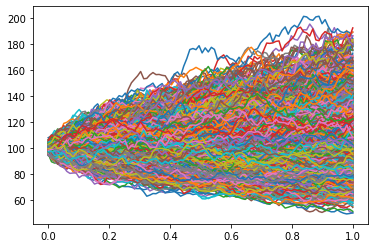

In [163]:
#another method MC delta with geo bro mo 
def get_geo_path(T,r,d,sigma, S0,steps):
    dt= T/steps
    t = np.linspace(0,T,steps)
    Bt = [0]+ np.random.standard_normal(size=steps)
    Bt = np.cumsum(Bt)*np.sqrt(dt)
    path = S0*np.exp(((r-d)-0.5*sigma**2)*t+sigma*Bt)
    plt.plot(t,path)
    return path
def get_final_S():
        path = get_geo_path(T=1,r=0.05,d=0,sigma=0.2, S0=100,steps=100) #input parameters here
        S = path[-1]
        return S
    
eps=0.0001
def get_final_S_eps():
        path = get_geo_path(T=1,r=0.05,d=0,sigma=0.2, S0=100+eps,steps=100) #input parameters here
        S_eps = path[-1]
        return S_eps
    
#MC Delta call option same random number generators for S0 and S0+epsilon using geometric bro mo
N=5000
T=1
r=0
eps = 0.0001
S_list=[]
payoff_list=[]
payoff_list_eps=[]
eps_list=[]
fdm_list=[]
K=100
for i in range(0,N):
    S=get_final_S()
    S_list.append(S)
    S_eps = S + eps
    eps_list.append(S_eps)

for j in range(0,len(S_list)):
    if eps_list[j]> K:
        payoff_list_eps.append(eps_list[j]-K)
    else:
        payoff_list_eps.append(0)
        
    if S_list[j]> K:
        payoff_list.append(S_list[j]-K)
    else:
        payoff_list.append(0)

mc_price_eps = np.mean(payoff_list_eps)*np.exp(-r*T)
mc_price = np.mean(payoff_list)*np.exp(-r*T)

mc_delta = (1/eps)*(mc_price_eps-mc_price)


print(mc_delta)